# Разведочный анализ данных

В качестве анализируемого мною был выбран датасет о сердченой недостаточности https://www.kaggle.com/fedesoriano/heart-failure-prediction.

Описание: сердечно-сосудистые заболевания (ССЗ) являются причиной смерти номер 1 во всем мире, унося, по оценкам, 17,9 миллиона жизней ежегодно, что составляет 31% всех смертей во всем мире. Четыре из 5 смертей от ССЗ происходят в результате сердечных приступов и инсультов, и одна треть этих смертей происходит преждевременно у людей в возрасте до 70 лет. Сердечная недостаточность является распространенным событием, вызванным ССЗ, и этот набор данных содержит 11 признаков, которые можно использовать для прогнозирования возможного заболевания сердца.
Люди с сердечно-сосудистыми заболеваниями или с высоким сердечно-сосудистым риском (из-за наличия одного или нескольких факторов риска, таких как гипертония, диабет, гиперлипидемия или уже установленное заболевание) нуждаются в раннем выявлении и лечении, в которых модель машинного обучения может оказать большую помощь.


Признаки: <br>
Age: возраст пациента, годы <br>
Sex: пол [M: мужской, F: женский] <br> 
ChestPainType: тип боли в груди [TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная] <br> 
RestingBP: артериальное давление в состоянии покоя [мм ртутного столба] <br>
Cholesterol: сывороточный холестерин [мм / дл]\ FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: иначе] <br>
RestingECG: электрокардиограмма в состоянии покоя [Normal: Нормальный, ST: с аномалией зубца ST-T (инверсии зубца T и / или подъем или понижение ST > 0,05 мВ), LVH: с вероятной или определенной гипертрофией левого желудочка по критериям Эстеса] <br>
MaxHR: максимальная достигнутая частота сердечных сокращений [числовое значение от 60 до 202] <br>
ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет] <br>
Oldpeak: Депрессия сегмента ST сердца <br> 
ST_Slope: наклон сегмента ST пикового упражнения [Up: восходящий, Flat: плоский, Down: нисходящий] <br> 
HeartDisease: наличие заболевания [1: заболевание сердца, 0: норма]

In [191]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts

In [192]:
# Загружаем данные
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [193]:
# Проверим данные на наличие пропусков
df.isna().sum(axis=0)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Анализ признаков

### Возраст

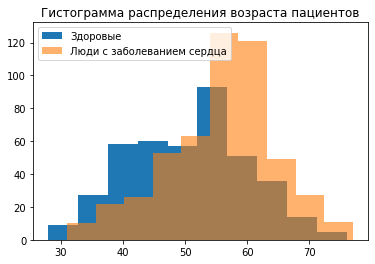

In [194]:
#Построим гистограммы распределения возраста
decease = df[df.HeartDisease == 1].Age.values
healthy = df[df.HeartDisease == 0].Age.values
_ = plt.hist(healthy, label="Здоровые")
_ = plt.hist(decease, label="Люди с заболеванием сердца", alpha=0.6)
_ = plt.title("Гистограмма распределения возраста пациентов")
_ = plt.legend()

На гистограммах видно, что распределение возрастов людей с заболеваниями сердца смещено вправо. Проверим это формально, для этого проверим гипотезу о равенстве медиан возрастов.

In [195]:
# Рассчитаем доверительный интервал для разности медиан с помощью бутстрепа и проверим гипотезу о равенстве медиан: 
# H0: M1=M2 (медианы равны)
# H1: M1!= M2 (медианы не равны)

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

np.random.seed(0)

decease_median_scores = list(map(np.median, get_bootstrap_samples(decease, 1000)))
healthy_median_scores = list(map(np.median, get_bootstrap_samples(healthy, 1000)))

print("Точечная оценка медианы возраста для больных: ", np.median(decease))
print("Точечная оценка медианы возраста для здоровых: ", np.median(healthy))

delta_median_scores = list(map(lambda x: x[0] - x[1], zip(decease_median_scores, healthy_median_scores)))
print("95% доверительный интервал для разности медиан",  stat_intervals(delta_median_scores, 0.05))

Точечная оценка медианы возраста для больных:  57.0
Точечная оценка медианы возраста для здоровых:  51.0
95% доверительный интервал для разности медиан [4. 7.]


95% доверительный интервал не содержит 0, значит гипотеза о равенстве медиан отвергается. Медианный возраст больных заболеваниями сердца выше на 4-7 лет. Можно сделать вывод о том, что возраст влияет на риск заболеваний сердца.

### Пол

Доля женщин в выборке: 0.210239651416122


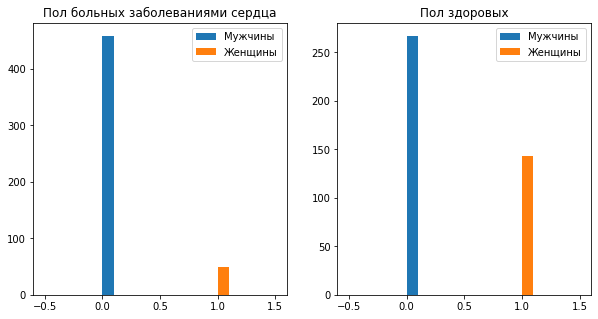

In [196]:
# Построим диаграммы числа мужчин и женщин среди больных и здоровых
# Заменим буквенные обозначения на числовые: [M: 0, F: 1])
df = df.replace({"M" : 0, "F" : 1})
decease = df[df.HeartDisease == 1].Sex.values
healthy = df[df.HeartDisease == 0].Sex.values
print("Доля женщин в выборке:", df.Sex.sum() / len(df.Sex))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(decease[decease == 0] ,label="Мужчины")
axes[0].hist(decease[decease == 1] ,label="Женщины")
axes[0].legend()
axes[0].set_title("Пол больных заболеваниями сердца")
axes[1].hist(healthy[healthy == 0] ,label="Мужчины")
axes[1].hist(healthy[healthy == 1] ,label="Женщины")
axes[1].legend()
_ = axes[1].set_title("Пол здоровых")

По графикам создается впечатление, что доля женщин среди здоровых выше, чем среди больных. Проверим это формально с помощью z-критерия для долей.

In [197]:
# Проверим гипотезу о равенстве равенстве долей женщин среди больных и здоровых с помощью z-критерия для долей (выборки независимы)
# H0: p1 = p2 (доли женщин равны)
# H1: p1 != p2 (доли женщин не равны)

def proportion_ztest_ind(p1, n1, p2, n2):
    P = (p1 * n1 + p2 * n2) / (n1 + n2)
    z = (p1 - p2) / np.sqrt(P * (1 - P) * ((1 / n1) + (1 / n2)))
    return 2 * (1 - sts.norm.cdf(np.abs(z)))

def hypothesis_check(p, alpha=0.05):
    print("Достигаемый уровень значимости:", p)
    if p < alpha:
        print("Гипотеза Н0 отвергается на уровне значимости", alpha)
    else:
        print("Гипотеза Н0 принимается на уровне значимости", alpha)

p1 = decease.sum()
n1 = len(decease)
p2 = healthy.sum()
n2 = len(healthy)

print("Точечная оценка доли женщин среди больных:", round(p1 / n1 , 2))
print("Точечная оценка доли женщин среди здоровых:", round(p2 / n2 , 2))
hypothesis_check(proportion_ztest_ind(p1 / n1, n1, p2 / n2, n2))


Точечная оценка доли женщин среди больных: 0.1
Точечная оценка доли женщин среди здоровых: 0.35
Достигаемый уровень значимости: 0.0
Гипотеза Н0 отвергается на уровне значимости 0.05


Гипотеза о равенстве долей женщин среди больных и здоровых отвергается на уровне значимости 0.05, можно сделать вывод, что пол пациента влияет на риск заболеваний сердца.

### Тип боли в груди

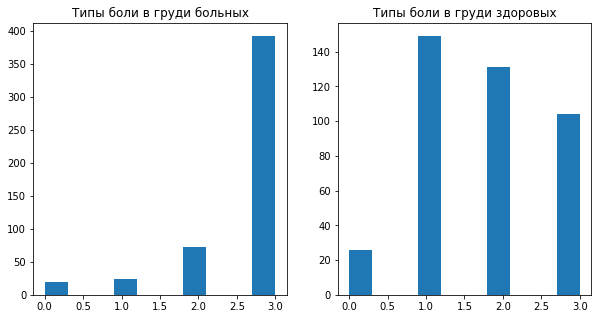

In [198]:
# Построим диаграммы числе людей с типами боли в груди среди больных и здоровых 
# Заменим буквенные обозначения на числовые: [TA: 0, ATA: 1, NAP: 2, ASY: 3])
df = df.replace({"TA" : 0, "ATA" : 1, "NAP" : 2, "ASY" : 3})
decease = df[df.HeartDisease == 1].ChestPainType.values
healthy = df[df.HeartDisease == 0].ChestPainType.values
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(decease)
axes[0].set_title("Типы боли в груди больных")
axes[1].hist(healthy)
_ = axes[1].set_title("Типы боли в груди здоровых")

По диаграммам видно, что у больных преобладает бессимптомные боли. Проверим связь между типом боли и наличием сердчного заболевания с помощью коэффициента ассоциации Крамера.

In [199]:
# Мы имеем 2 категориальных признака, у типа боли в груди 4 градации, у наличия заболевания - 2. 
# Чтобы измерить степень ассоциации между ними посчитаем коэффициент V Крамера.

def cramer(matrix):
    chi2 = sts.chi2_contingency(matrix)[0]
    n = sum(matrix.sum())
    phi2 = chi2 / n
    r, k = matrix.shape
    phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

matrix = pd.crosstab(df.HeartDisease, df.ChestPainType)
print("Коэффициент V Крамера между типом боли в груди и наличием сердечного заболевания:", cramer(matrix))

Коэффициент V Крамера между типом боли в груди и наличием сердечного заболевания: 0.5376392140005096


Согласно рекомендациям Rea & Parker значение коэффициента Крамера в диапазоне 0.4 < 0.54 < 0.6 говорит об относительно сильной связи между величинами. Можно сделать вывод, что тип боли в груди влияет на риск сердечного заболевания.

### Артериальное давление (АД) в состоянии покоя

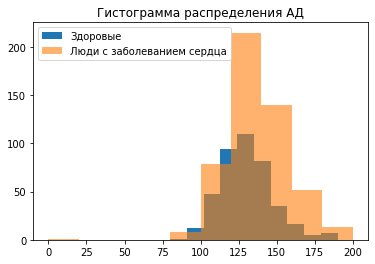

In [200]:
#Построим гистограммы распределения АД
decease = df[df.HeartDisease == 1].RestingBP.values
healthy = df[df.HeartDisease == 0].RestingBP.values
_ = plt.hist(healthy, label="Здоровые")
_ = plt.hist(decease, label="Люди с заболеванием сердца", alpha=0.6)
_ = plt.title("Гистограмма распределения АД")
_ = plt.legend()

На гистограмме не видно значительных различий между здоровыми и больными людьми. Проверим гипотезу о равенстве средних с помощью t-критерия Стьюдента

In [201]:
# Проверим гипотезу о равенстве средних значений (выборки независимы) с помощью t-критерия. 
# Распределения не сильно отличаются от нормального, поэтому t-критерий можно применить.
# H0: m1=m2 (средние значения равны)
# H1: m1!= m2 (средние значения не равны)

print("Точечная оценка среднего АД для больных: ", np.mean(decease))
print("Точечная оценка среднего АД для здоровых: ", np.mean(healthy))

_, p =sts.ttest_ind(decease, healthy)
hypothesis_check(p)

Точечная оценка среднего АД для больных:  134.18503937007873
Точечная оценка среднего АД для здоровых:  130.18048780487806
Достигаемый уровень значимости: 0.0010953145851724372
Гипотеза Н0 отвергается на уровне значимости 0.05


Гипотезу о равенстве средних значений можно отвергнуть на уровне значимости 0.05, однако различие между средними не очень большое, поэтому возможно не представляет практической значимости.

### Cholesterol

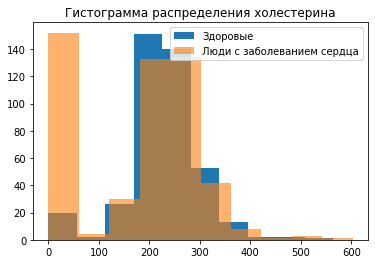

In [202]:
#Построим гистограммы распределения сывороточного холестерина
decease = df[df.HeartDisease == 1].Cholesterol.values
healthy = df[df.HeartDisease == 0].Cholesterol.values
_ = plt.hist(healthy, label="Здоровые")
_ = plt.hist(decease, label="Люди с заболеванием сердца", alpha=0.6)
_ = plt.title("Гистограмма распределения холестерина")
_ = plt.legend()

На гистограмме видно, что у распределения холестерина для больных людей много значений близких к нулю. Проверим гипотезу о равестве распределений холестерина с помощью критерия Манна-Уитни, так как распределения очень сильно отличаются от нормального.

In [203]:
# Проверим гипотезу о равенстве распределений холестерина для больных и здоровых с помощью критерия Манна-Уитни (выборки независимы)
# H0: F_x1(x) = F_x2(x) (выборки получены из одного распределения)
# H1: F_x1(x) = F_x2(x + delta), delta != 0 (выборки получены из разных распределений)

_, p =sts.mannwhitneyu(decease, healthy)
hypothesis_check(p)

Достигаемый уровень значимости: 1.1401561817724619e-05
Гипотеза Н0 отвергается на уровне значимости 0.05


Гипотеза о равенства распределений отвергается на уровне значимости 0.05, однако сложно сказать, почему у людей с низким сывороточным холестерином высокий риск заболеваний сердца. 

### Уровень сахара

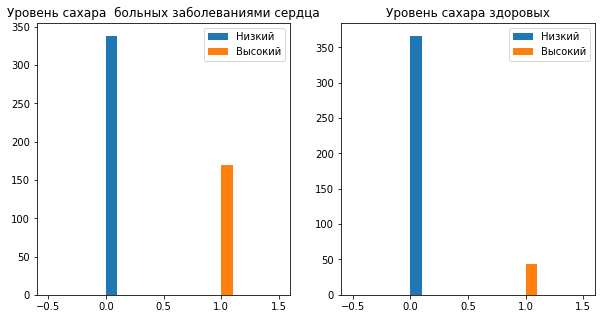

In [204]:
# Построим диаграммы числа людей с высоким и низким уровнем сахара натощак среди больных и здоровых
decease = df[df.HeartDisease == 1].FastingBS.values
healthy = df[df.HeartDisease == 0].FastingBS.values
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(decease[decease == 0] ,label="Низкий")
axes[0].hist(decease[decease == 1] ,label="Высокий")
axes[0].legend()
axes[0].set_title("Уровень сахара  больных заболеваниями сердца")
axes[1].hist(healthy[healthy == 0] ,label="Низкий")
axes[1].hist(healthy[healthy == 1] ,label="Высокий")
axes[1].legend()
_ = axes[1].set_title("Уровень сахара здоровых")

На графиках хорошо видно, что среди больных доля людей с высоким уровнем сахара выше, чем среди здоровых. Проверим значимость этого различия с помощью z-критерия для разности долей.

In [205]:
# Проверим гипотезу о равенстве равенстве долей людей с высоким уровнем сахара среди больных и здоровых с помощью z-критерия для долей (выборки независимы)
# H0: p1 = p2 (доли равны)
# H1: p1 != p2 (долине равны)

p1 = decease.sum()
n1 = len(decease)
p2 = healthy.sum()
n2 = len(healthy)

print("Точечная оценка доли людей с высоким уровнем сахара среди больных:", round(p1 / n1 , 2))
print("Точечная оценка доли людей с высоким уровнем сахара среди здоровых:", round(p2 / n2 , 2))
hypothesis_check(proportion_ztest_ind(p1 / n1, n1, p2 / n2, n2))

Точечная оценка доли людей с высоким уровнем сахара среди больных: 0.33
Точечная оценка доли людей с высоким уровнем сахара среди здоровых: 0.11
Достигаемый уровень значимости: 6.661338147750939e-16
Гипотеза Н0 отвергается на уровне значимости 0.05


Гипотеза о равенстве долей отвергается на уровне значимости 0.05, можно сделать вывод что уровень сахара влияет на риск сердченых заболеваний.

### Электрокардиограмма в состоянии покоя 

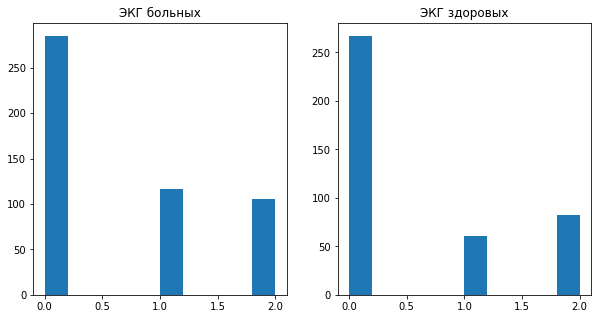

In [206]:
# Построим диаграммы числа людей с различными результатами ЭКГ среди больных и здоровых 
# Заменим буквенные обозначения на числовые:# [0: Нормальный, 1: с аномалией зубца ST-T (инверсии зубца T и / или подъем или понижение ST > 0,05 мВ), 
# 2:  с вероятной или определенной гипертрофией левого желудочка по критериям Эстеса]
df = df.replace({"Normal" : 0, "ST" : 1, "LVH" : 2})
decease = df[df.HeartDisease == 1].RestingECG.values
healthy = df[df.HeartDisease == 0].RestingECG.values
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(decease)
axes[0].set_title("ЭКГ больных")
axes[1].hist(healthy)
_ = axes[1].set_title("ЭКГ здоровых")

На графиках заметно, что у здоровых людей доля нормальной ЭКГ выше, чем у больных. Проверим связь между ЭКГ и наличием сердчного заболевания с помощью коэффициента ассоциации Крамера.

In [207]:
# Мы имеем 2 категориальных признака, у ЭКГ 3 градации, у наличия заболевания - 2. 
# Чтобы измерить степень ассоциации между ними посчитаем коэффициент V Крамера.

matrix = pd.crosstab(df.HeartDisease, df.RestingECG)
print("Коэффициент V Крамера между результатом ЭКГ и наличием сердечного заболевания:", cramer(matrix))

Коэффициент V Крамера между результатом ЭКГ и наличием сердечного заболевания: 0.0986788349534133


Согласно рекомендациям Rea & Parker значение коэффициента Крамера в диапазоне 0.099 < 0.1 говорит об отсутствии связи между величинами. Можно сделать вывод, что результат ЭКГ не влияет на риск сердечного заболевания.

### Максимальная достигнутая частота сердечных сокращений (чсс)

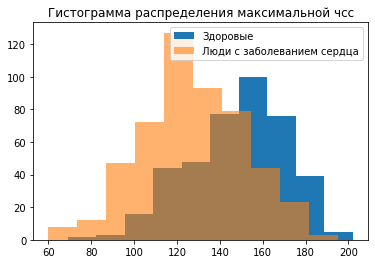

In [208]:
#Построим гистограммы распределения максимальной чсс для больных и здоровых
decease = df[df.HeartDisease == 1].MaxHR.values
healthy = df[df.HeartDisease == 0].MaxHR.values
_ = plt.hist(healthy, label="Здоровые")
_ = plt.hist(decease, label="Люди с заболеванием сердца", alpha=0.6)
_ = plt.title("Гистограмма распределения максимальной чсс")
_ = plt.legend()

На гистограмме видно, что максимальная чсс у здоровых людей в среднем выше, чем у больных. Распределения не сильно отличаются от нормального,поэтому проверим гипотезу о равенстве средних с помощью t-критерия Стьюдента, 

In [209]:
# Проверим гипотезу о равенстве средних значений (выборки независимы) с помощью t-критерия. 
# H0: m1=m2 (средние значения равны)
# H1: m1!= m2 (средние значения не равны)

print("Точечная оценка максимальной чсс для больных: ", np.mean(decease))
print("Точечная оценка максимальной чсс для здоровых: ", np.mean(healthy))

_, p =sts.ttest_ind(decease, healthy)
hypothesis_check(p)

Точечная оценка максимальной чсс для больных:  127.65551181102362
Точечная оценка максимальной чсс для здоровых:  148.15121951219513
Достигаемый уровень значимости: 1.1377859840278095e-36
Гипотеза Н0 отвергается на уровне значимости 0.05


Гипотеза о равенстве средних отвергается на уровне значимости 0.05, из чего можно сделать вывод, что максимальная чсс связана с наличием у человека сердечного заболевания.

### Стенокардия, вызванная нагрузкой

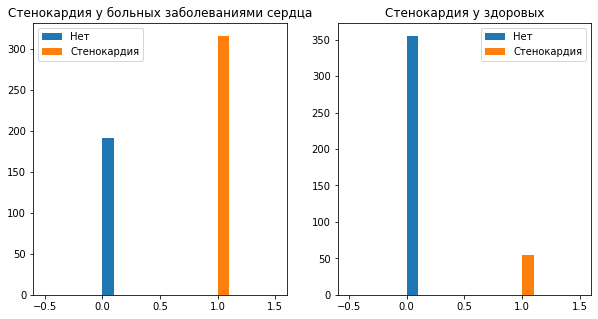

In [210]:
# Построим диаграммы числа людей со стенокардией и без среди больных и здоровых
# Заменим буквенные обозначения на числовые: [Y: 1, N: 0])
df = df.replace({"N" : 0, "Y" : 1})
decease = df[df.HeartDisease == 1].ExerciseAngina.values
healthy = df[df.HeartDisease == 0].ExerciseAngina.values
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(decease[decease == 0] ,label="Нет")
axes[0].hist(decease[decease == 1] ,label="Стенокардия")
axes[0].legend()
axes[0].set_title("Стенокардия у больных заболеваниями сердца")
axes[1].hist(healthy[healthy == 0] ,label="Нет")
axes[1].hist(healthy[healthy == 1] ,label="Стенокардия")
axes[1].legend()
_ = axes[1].set_title("Стенокардия у здоровых")

По графикам явно видно, что доля людей со стенокардией у больных значительно выше, чем у здоровых. Очевидно различие значимо, посмотрим на доли людей со стенокардией среди больных и здоровых.

In [211]:
p1 = decease.sum()
n1 = len(decease)
p2 = healthy.sum()
n2 = len(healthy)

print("Точечная оценка доли людей со стенокардией среди больных:", round(p1 / n1 , 2))
print("Точечная оценка доли людей со стенокардией среди здоровых:", round(p2 / n2 , 2))

Точечная оценка доли людей со стенокардией среди больных: 0.62
Точечная оценка доли людей со стенокардией среди здоровых: 0.13


Различие очень велико, и его можно считать практически значимым.

### Депрессия сегмента ST

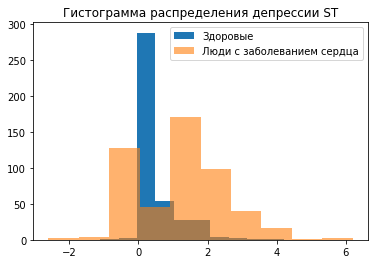

In [212]:
#Построим гистограммы распределения депрессии ST для больных и здоровых
decease = df[df.HeartDisease == 1].Oldpeak.values
healthy = df[df.HeartDisease == 0].Oldpeak.values
_ = plt.hist(healthy, label="Здоровые")
_ = plt.hist(decease, label="Люди с заболеванием сердца", alpha=0.6)
_ = plt.title("Гистограмма распределения депрессии ST")
_ = plt.legend()

По графику видно что распределения сильно отличаются. У здоровых людей данный показатель в среднем близок к 0, тогда как у больных наоборот, в основном отличен от нуля.

### Наклон сегмента ST пикового упражнения

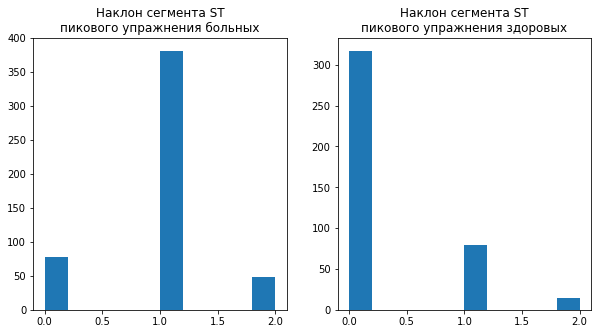

In [213]:
# Построим диаграммы числа людей с различными наклонами сегмента ST пикового упражнения среди больных и здоровых 
# Заменим буквенные обозначения на числовые:# [0: восходящий, 1: плоский, 2: нисходящий]
df = df.replace({"Up" : 0, "Flat" : 1, "Down" : 2})
decease = df[df.HeartDisease == 1].ST_Slope.values
healthy = df[df.HeartDisease == 0].ST_Slope.values
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(decease)
axes[0].set_title("Наклон сегмента ST\nпикового упражнения больных")
axes[1].hist(healthy)
_ = axes[1].set_title("Наклон сегмента ST\nпикового упражнения здоровых")

По графикам видно, что у больных преобладает плоский наклон, тогда как у больных - восходящий. Проверим связь между наклоном сегмента ST пикового упражнения и наличием сердчного заболевания с помощью коэффициента ассоциации Крамера.

In [214]:
# Мы имеем 2 категориальных признака, у наклона сегмента ST пикового упражнения 3 градации, у наличия заболевания - 2. 
# Чтобы измерить степень ассоциации между ними посчитаем коэффициент V Крамера.

matrix = pd.crosstab(df.HeartDisease, df.ST_Slope)
print("Коэффициент V Крамера между результатом ЭКГ и наличием сердечного заболевания:", cramer(matrix))

Коэффициент V Крамера между результатом ЭКГ и наличием сердечного заболевания: 0.6212492103002963


Согласно рекомендациям Rea & Parker значение коэффициента Крамера в диапазоне 0.6< 0.62 < 0.1 говорит о сильной связи между величинами. Можно сделать вывод, что наклон сегмента ST пикового упражнения связан с риском сердечного заболевания.

## Построение предсказательной модели

### Логистическая регрессия

Обучим на данных 2 модели с использованием кросс-валидации: логистическую регрессию и случайный лес.

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

x = df.iloc[:, :11]
y = df.HeartDisease

model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
score = np.mean(cross_val_score(model, x, y, cv=5))

print("Средняя точность логистической регрессии:", score)

Средняя точность логистической регрессии: 0.8082679971489666


### Случайный лес

In [216]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200)
score = np.mean(cross_val_score(forest, x, y, cv=5))
print("Средняя точность случайного леса:", score)

Средняя точность случайного леса: 0.8343727726300785


В среднем случайный лес имеет точность примерно на 2% выше, чем логистическая регрессия. Теперь посмотрим на коэффициенты логистической регрессии.

In [217]:
import statsmodels.api as sm

model1 = sm.GLM(y, x, family=sm.families.Binomial())
model1_results = model1.fit()
model1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                            GLM   Df Residuals:                      907
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -333.92
Date:                Sun, 26 Sep 2021   Deviance:                       667.85
Time:                        21:46:03   Pearson chi2:                 1.17e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age               -0.0009      0.010     -0.085      0.932      -0.021       0.019
Sex               -1.2653      0.251     -5.033      0.000      -1.758      -0.773
ChestPainType      0.6486      0.105      6.188      0.000       0.443       0.854
RestingBP         -0.0012      0.005     -0.233      0.816      -0.011       0.009
Cholesterol       -0.0032      0.001     -3.177      0.001      -0.005      -0.001
FastingBS          1.0961      0.258      4.241      0.000       0.589       1.603
RestingECG         0.1121      0.123      0.911      0.363      -0.129       0.353
MaxHR             -0.0147      0.003     -4.433      0.000      -0.021      -0.008
ExerciseAngina     1.0599      0.231      4.581      0.000       0.606       1.513
Oldpeak            0.3778      0.113      3.330      0.001       0.155       0.600
ST_Slope           1.5865      0.200      7.943      0.000       1.195       1.978
==================================================================================
"""

Коэффициенты при возрасте, максимальном АД и результате ЭКГ не значимы на уровне значимости 0.05. Из анализа выше мы сделали подобные выводы насчет максимального АД и результатов ЭКГ, что касается возраста, то нами была переоцененая его практическая значимость. Посмотрим на корреляции между признаками

In [218]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.075162,0.107589
Cholesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.111471,-0.232741
FastingBS,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


Можно заметить, что незначимые признаки имеют очень небольшой коэффициент корреляции с предсказываемой переменной (кроме возраста, но он скоррелирован с другими признаками, что, возможно, и привело к его незначимости).